In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Glimpse of Train Data

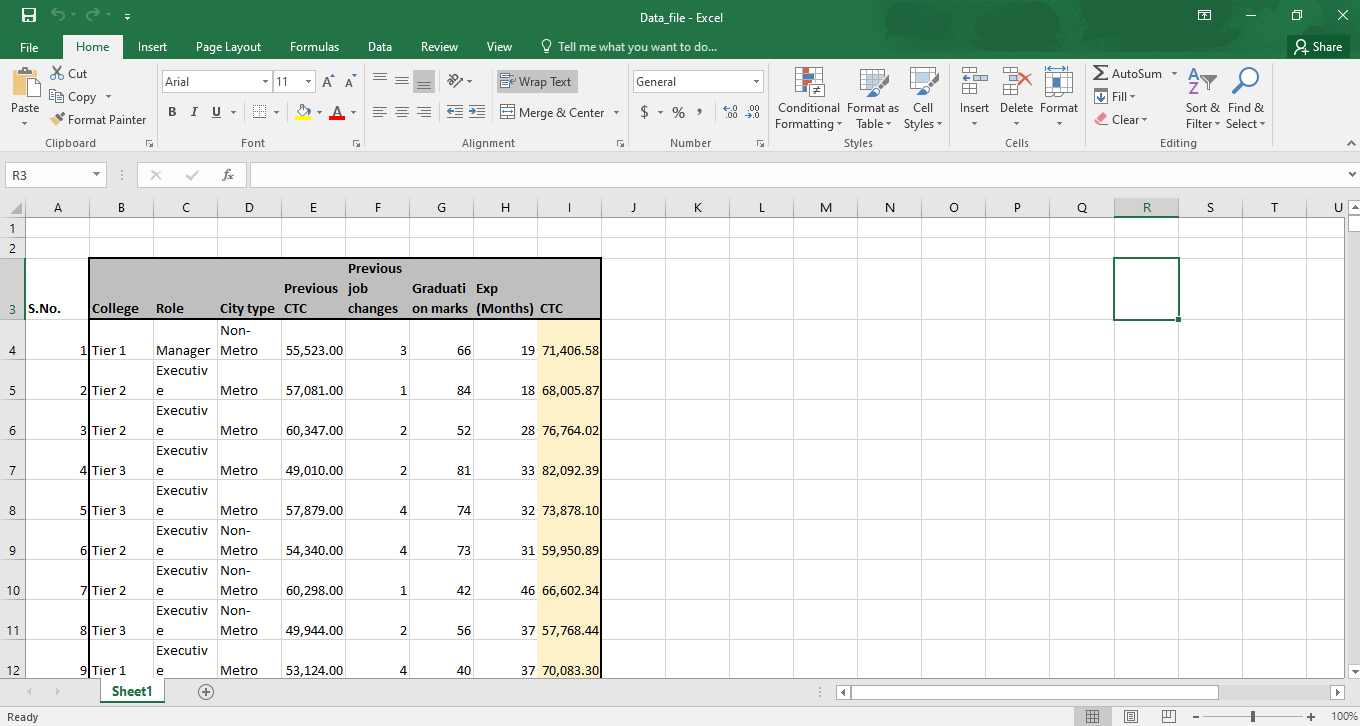

In [2]:
from IPython.display import Image
Image('CTC Train Data.png')

# Load Train Data

In [3]:
df = pd.read_excel('Data_file.xlsx', skiprows=2)
df.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.58
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.87
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.02
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.39
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.10


# Correlation

<AxesSubplot:>

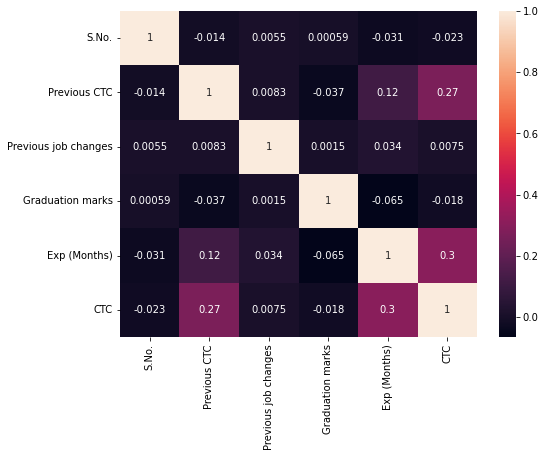

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

# Generation of Report data 

In [5]:
from pandas_profiling import ProfileReport

In [6]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Drop Columns : 'S.No.', as it is irrelavant in model building

In [7]:
df.drop('S.No.', axis=1, inplace=True)
df.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.58
1,Tier 2,Executive,Metro,57081,1,84,18,68005.87
2,Tier 2,Executive,Metro,60347,2,52,28,76764.02
3,Tier 3,Executive,Metro,49010,2,81,33,82092.39
4,Tier 3,Executive,Metro,57879,4,74,32,73878.10


# Five Number Summaries Of Data

In [8]:
df.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.339036
std,6685.600553,1.123502,14.894696,14.049960,12551.280147
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50547.000000,2.000000,47.000000,27.000000,66905.067500
50%,55293.500000,3.000000,60.000000,39.000000,73112.640000
75%,60150.500000,4.000000,73.000000,51.000000,80747.175000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


# Converting Categorical Data to numerical

In [9]:
cols = ['College', 'Role', 'City type']

In [10]:
for col in cols:
    one = pd.get_dummies(df[col],prefix=col)#dummy varibale trap
    df = pd.concat([df,one],axis=1).drop(col,axis=1)

In [11]:
df.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
0,55523,3,66,19,71406.58,1,0,0,0,1,0,1
1,57081,1,84,18,68005.87,0,1,0,1,0,1,0
2,60347,2,52,28,76764.02,0,1,0,1,0,1,0
3,49010,2,81,33,82092.39,0,0,1,1,0,1,0
4,57879,4,74,32,73878.10,0,0,1,1,0,1,0


# Drop Columns 'College_Tier 3', 'Role_Executive', 'City type_Non-Metro' to avoid Muti-colinearity

In [12]:
df.drop(['College_Tier 3', 'Role_Executive','City type_Non-Metro'], axis=1, inplace=True)

In [13]:
df.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro
0,55523,3,66,19,71406.58,1,0,1,0
1,57081,1,84,18,68005.87,0,1,0,1
2,60347,2,52,28,76764.02,0,1,0,1
3,49010,2,81,33,82092.39,0,0,0,1
4,57879,4,74,32,73878.10,0,0,0,1


# Separating Target & Features In  Data

In [14]:
x = df.drop('CTC', axis=1)
y = df['CTC']

In [15]:
x.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),College_Tier 1,College_Tier 2,Role_Manager,City type_Metro
0,55523,3,66,19,1,0,1,0
1,57081,1,84,18,0,1,0,1
2,60347,2,52,28,0,1,0,1
3,49010,2,81,33,0,0,0,1
4,57879,4,74,32,0,0,0,1


In [16]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

# Model Buliding using Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(x,y)

LinearRegression()

# Load Test Data and Check First 5 rows

In [20]:
test = pd.read_excel('Test_data_file.xlsx')
test.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.57653,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.87063,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.02028,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.38688,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.09773,NaN


# Separating Target & Features In Test Data

In [21]:
test_x = test[['previous CTC', 'previous job changes', 'Graduation marks', 'Exp', 'College_T1', 'College_T2', 'Role_Manager','City_Metro']]
test_x.head()

,previous CTC,previous job changes,Graduation marks,Exp,College_T1,College_T2,Role_Manager,City_Metro
0,55523,3,66,19,1,0,1,0
1,57081,1,84,18,0,1,0,1
2,60347,2,52,28,0,1,0,1
3,49010,2,81,33,0,0,0,1
4,57879,4,74,32,0,0,0,1


In [22]:
test_y = test['Actual CTC']
test_y.head()

0    71406.57653
1    68005.87063
2    76764.02028
3    82092.38688
4    73878.09773
Name: Actual CTC, dtype: float64

# Prediction on Test Data

In [23]:
pred = lr.predict(test_x)
test['Predicted CTC'] = lr.predict(test_x)
test.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.57653,86123.937724
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.87063,65789.546863
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.02028,69941.690699
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.38688,66843.038412
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.09773,70556.761579


# Evaluation of the Result Analysis by root_mean_squared_error

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
RMSE = mean_squared_error(test_y, pred, squared=False)
RMSE

7853.530228169217